In [292]:
import pandas as pd


In [293]:
df2=pd.read_csv('dataset.csv')

In [294]:
from sklearn.impute import SimpleImputer
import numpy as np

# Imputing missing values for numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df2[['LoanAmount', 'Loan_Amount_Term']] = num_imputer.fit_transform(df2[['LoanAmount', 'Loan_Amount_Term']])

# Imputing missing values for categorical columns with mode
# First, calculate the mode (most frequent value) for each column
cat_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in cat_columns:
    df2[col].fillna(df2[col].mode()[0], inplace=True)

# Check if there are any missing values left
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [295]:
# cols=['Gender','Married','Self_Employed','Self_Employed']
# for col in ['Gender', 'Married', 'Self_Employed','Credit_History']:
#     most_frequent = df2[col].mode()[0]
#     df2[col].fillna(most_frequent, inplace=True)

In [296]:

# for col1 in ['LoanAmount', 'Loan_Amount_Term']:
#     mean_value = df2[col1].median()
#     df2[col1].fillna(mean_value, inplace=True)
# df2

In [297]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col2 in df2.columns:
    if df2[col2].dtype == 'object':
        df2[col2] = label_encoder.fit_transform(df2[col2])
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [298]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


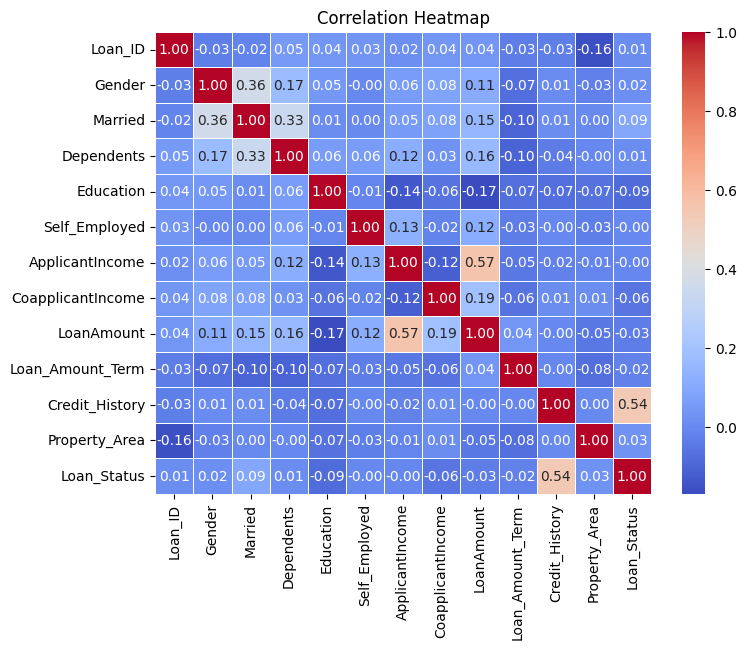

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df2.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

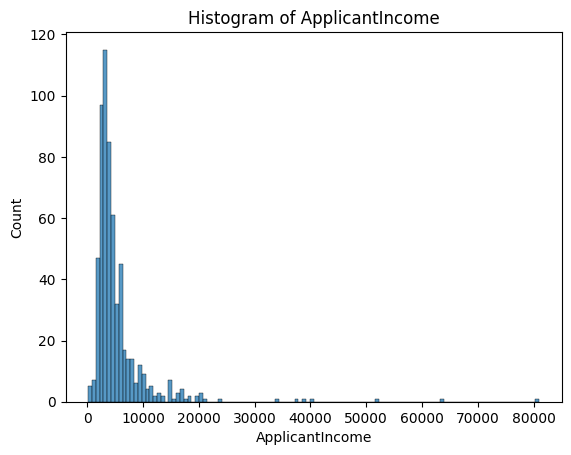

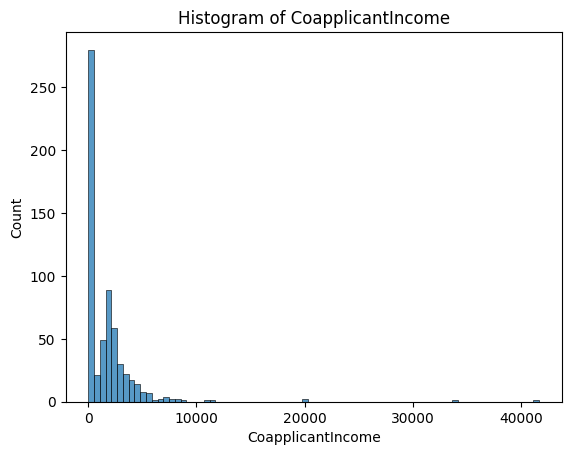

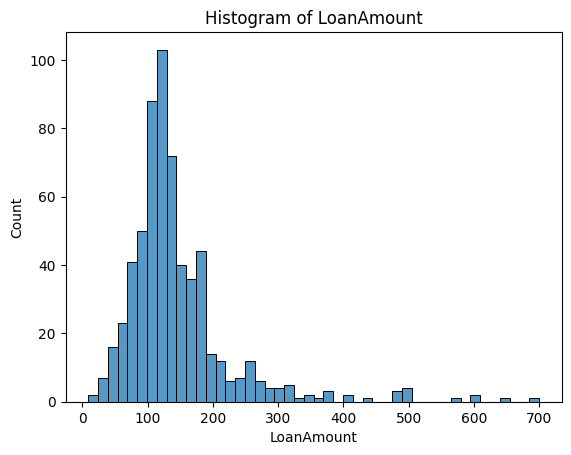

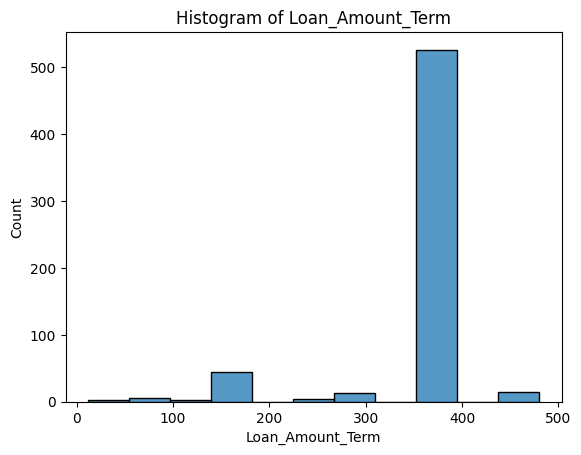

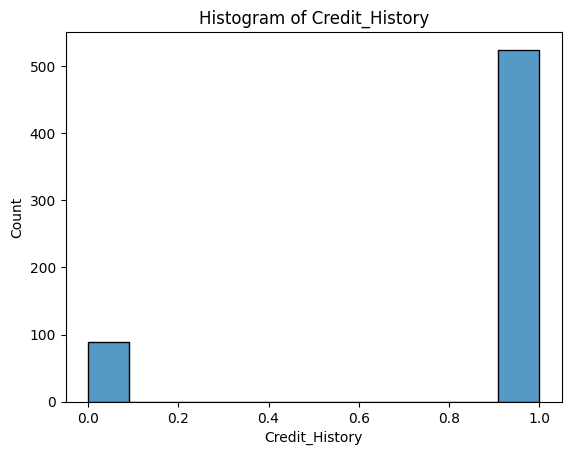

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical variables
numerical_vars = df2.select_dtypes(include=['int64', 'float64']).columns
for var in numerical_vars:
    sns.histplot(df2[var])
    plt.title(f'Histogram of {var}')
    plt.show()

# Plot count plots for categorical variables
categorical_vars = df2.select_dtypes(include=['object']).columns
for var in categorical_vars:
    sns.countplot(data=df2, x=var)
    plt.title(f'Count plot of {var}')
    plt.show()


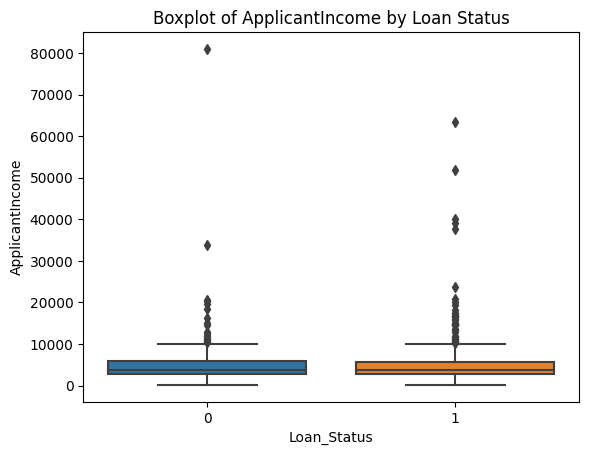

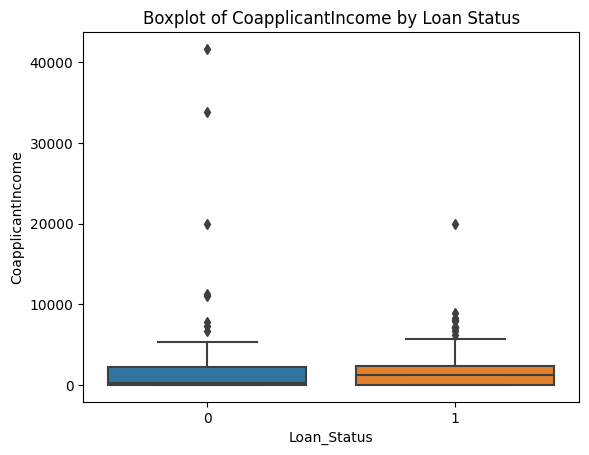

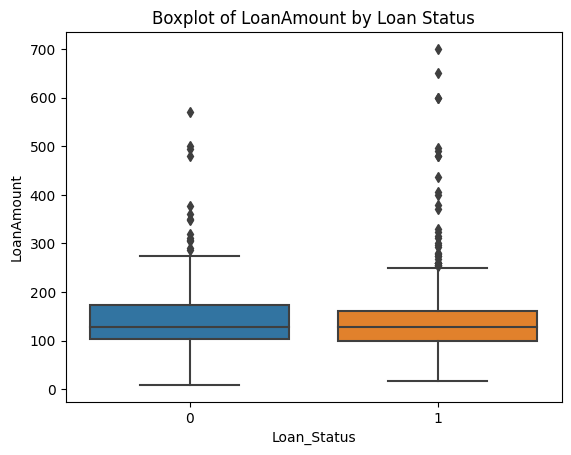

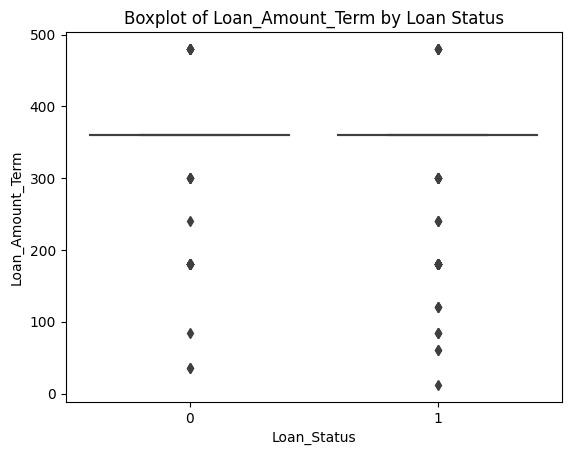

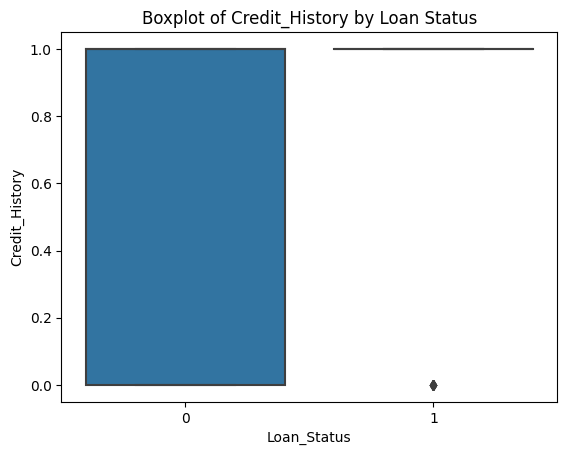

In [301]:
# Plot boxplots for numerical variables against loan prediction
for var1 in numerical_vars:
    sns.boxplot(data=df2, x='Loan_Status', y=var1)
    plt.title(f'Boxplot of {var1} by Loan Status')
    
    plt.show()

# Plot bar plots for categorical variables against loan prediction
for var1 in categorical_vars:
    sns.countplot(data=df2, x=var1, hue='Loan_Status')
    plt.title(f'Bar plot of {var1} by Loan Status')
    plt.show()


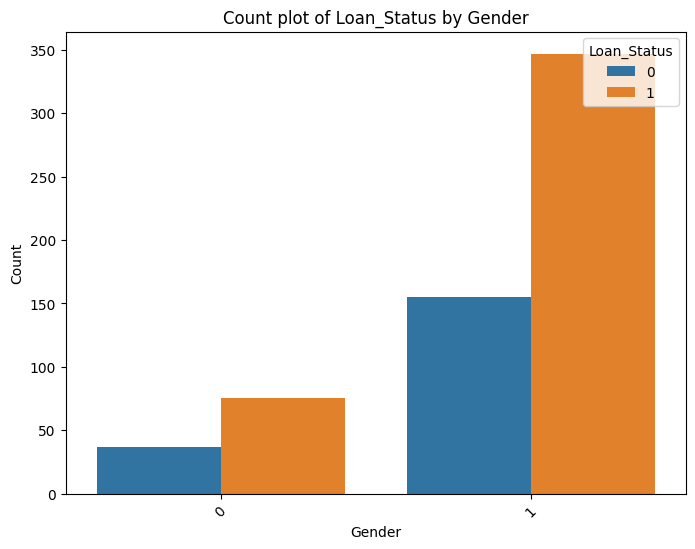

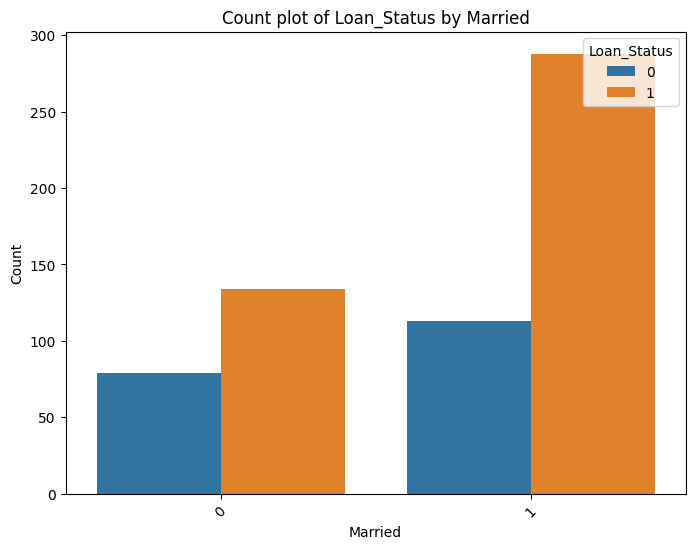

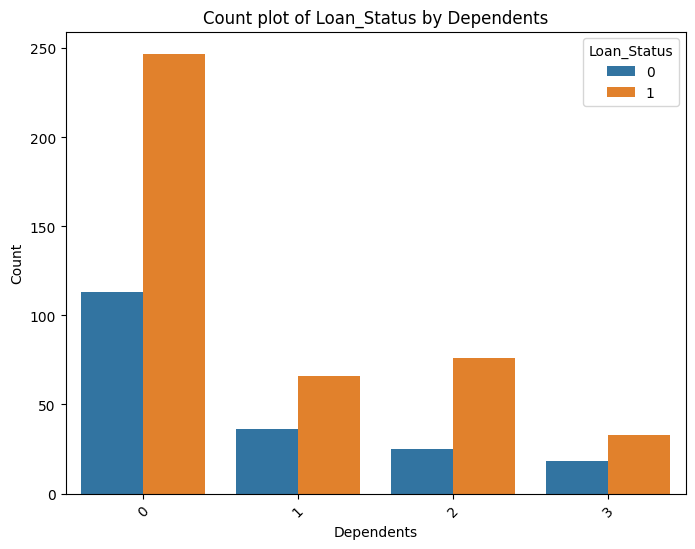

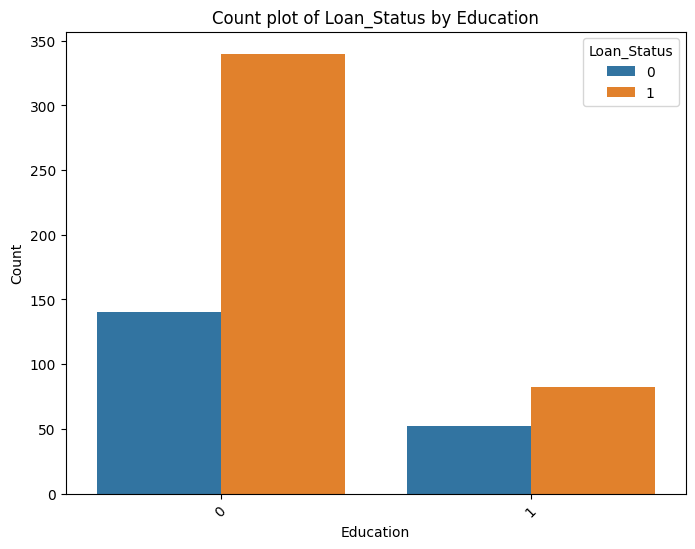

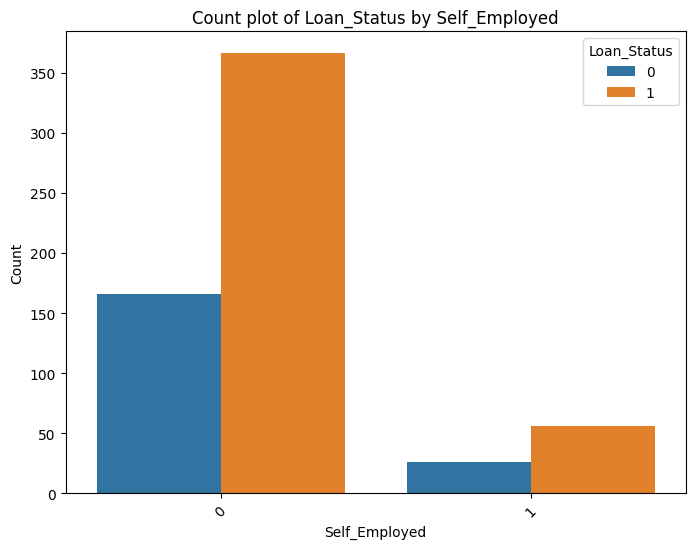

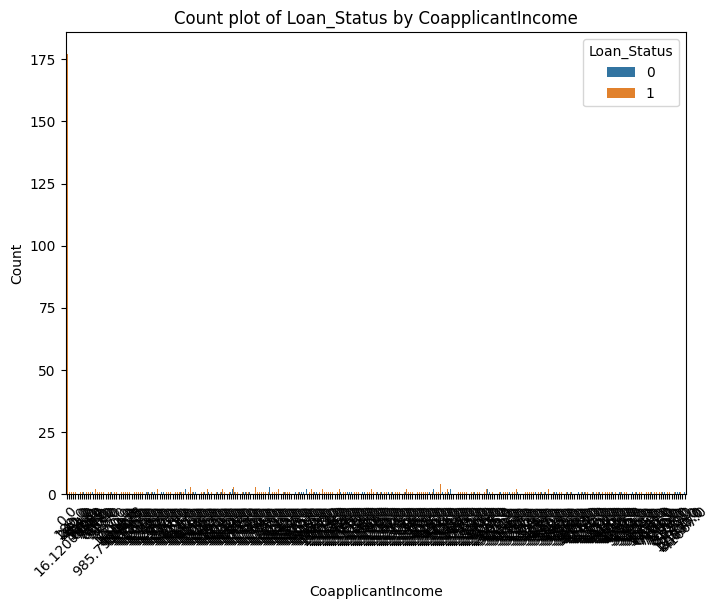

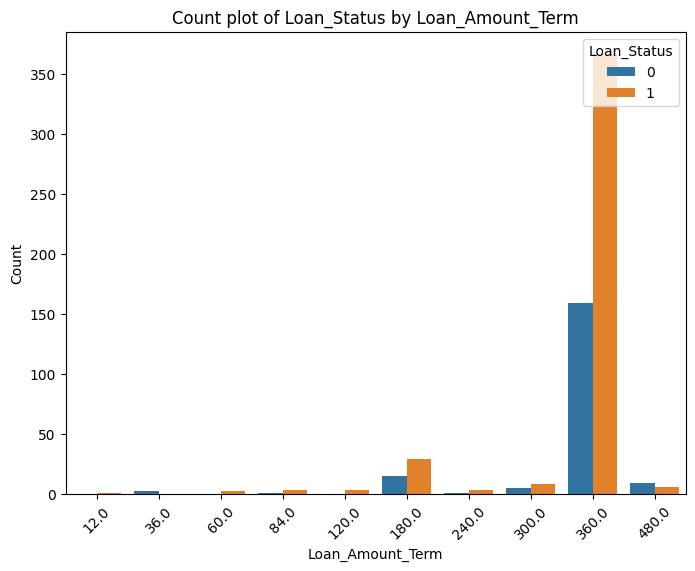

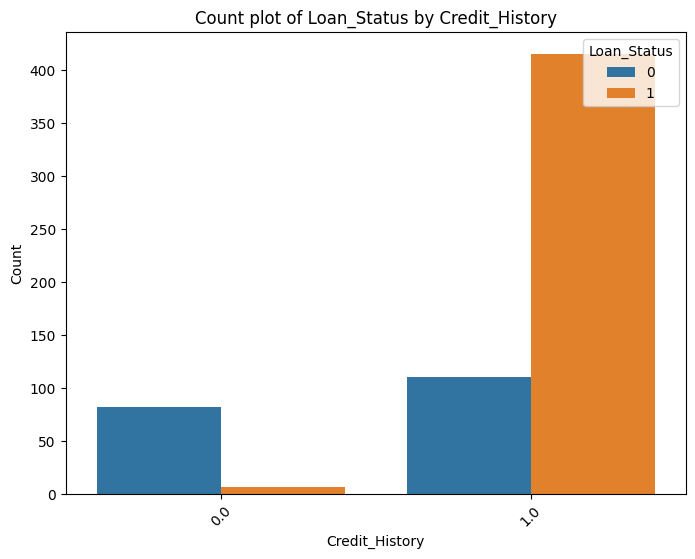

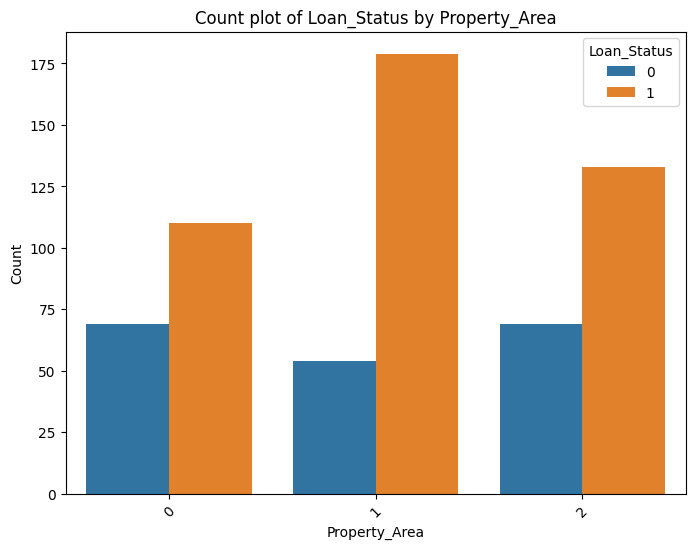

In [302]:
for column in df2.columns:
    if column != 'Loan_Status' and column != 'Loan_ID' and column != 'ApplicantIncome' and column != 'LoanAmount' and column!='coapplicantIncome':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df2, x=column, hue='Loan_Status')
        plt.title(f'Count plot of Loan_Status by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Loan_Status', loc='upper right')
        plt.show()


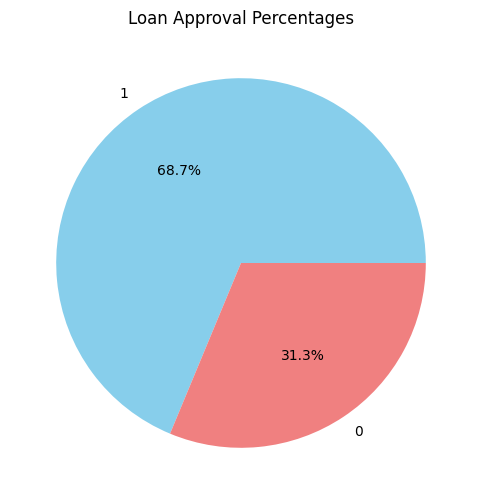

In [303]:
# Pie chart showing loan approval percentages
plt.figure(figsize=(6, 6))
df2['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Loan Approval Percentages')
plt.ylabel('')
plt.show()


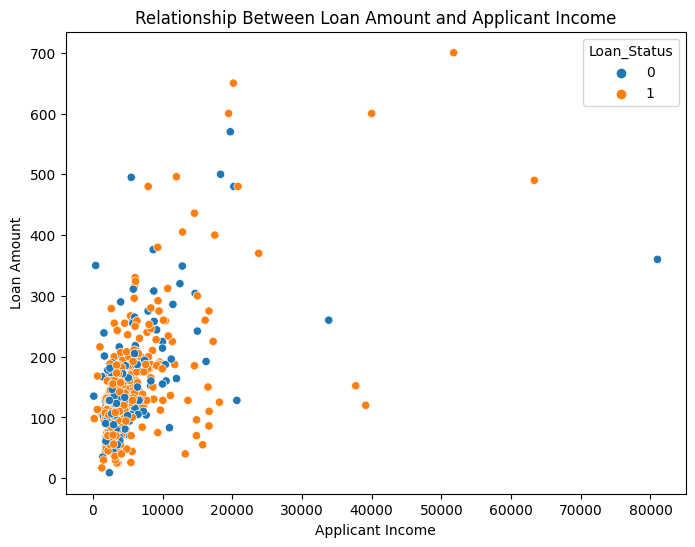

In [304]:
# Scatter plot showing relationship between Loan Amount and Applicant Income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Relationship Between Loan Amount and Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan_Status')
plt.show()


In [305]:
cor_target_abs = abs(corr_matrix['Loan_Status'])
features_filtered = cor_target_abs[cor_target_abs > -1]
features_sorted = features_filtered.sort_values()
features_sorted

Self_Employed        0.003700
ApplicantIncome      0.004710
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Loan_Amount_Term     0.022549
Property_Area        0.032112
LoanAmount           0.033214
CoapplicantIncome    0.059187
Education            0.085884
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [306]:
import pandas as pd

# Assuming df is your DataFrame

# Calculate mean and standard deviation
mean = df2.mean()
std = df2.std()

# Define a threshold for identifying outliers
threshold = 3  # You can adjust this threshold based on your dataset and requirements

# Identify outliers using z-score method
outliers = (df2- mean).abs() > threshold * std

# Remove outliers
df2 = df2[~outliers.any(axis=1)]

# Optionally, you can also drop rows with missing values
df2.dropna(inplace=True)

# Print the shape of the original and modified DataFrame
print("Original DataFrame shape:", df2.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)


Original DataFrame shape: (577, 13)
DataFrame shape after removing outliers: (577, 13)


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_17812\3919641029.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [307]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [309]:
#Feature Scaling

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [310]:
GB=GaussianNB()
GB.fit(X_train,y_train)

GaussianNB()

In [311]:
pred_GB=GB.predict(X_test)
pred_GB

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [312]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
precision = precision_score(y_test, pred_GB)
recall = recall_score(y_test, pred_GB)
accuracy = accuracy_score(y_test, pred_GB)
f1 = f1_score(y_test, pred_GB)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Precision: 0.7935483870967742
Recall: 0.984
Accuracy: 0.8045977011494253
F1 Score: 0.8785714285714286


C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7672413793103449


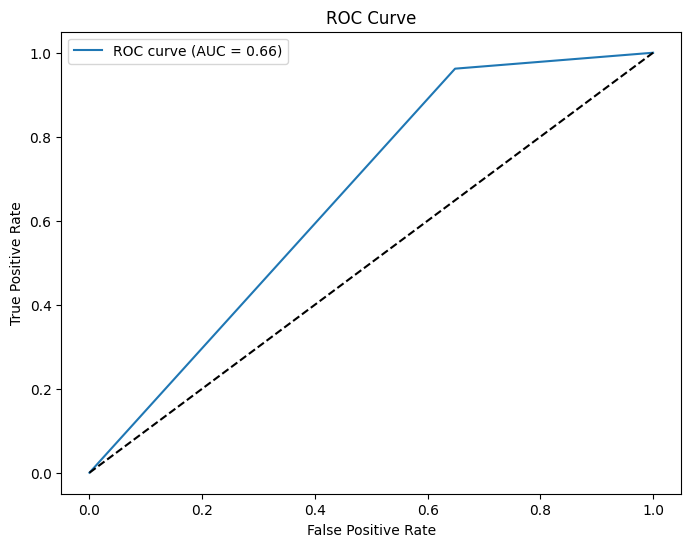

Precision: 0.76
Recall: 0.9620253164556962
F1 Score: 0.8491620111731845
AUC: 0.6566883339035238


In [313]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# importing voting classifier
from sklearn.ensemble import VotingClassifier

# Splitting between train data into training and validation dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)

# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(X_train, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test)


accuracy = accuracy_score(y_test, pred_final)
print("Accuracy:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate precision
precision = precision_score(y_test, pred_final)

# Calculate recall
recall = recall_score(y_test, pred_final)

# Calculate F1 score
f1 = f1_score(y_test, pred_final)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_final)
auc = roc_auc_score(y_test, pred_final)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)


In [318]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor

# Loading the dataset

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = BaggingRegressor(base_estimator=xgb.XGBRegressor())

model.fit(X_train, y_train)


pred = model.predict(X_test)

# Converting the predictions to binary (0 or 1)
pred_binary = [1 if p >= 0.5 else 0 for p in pred]

# Calculating accuracy
accuracy = accuracy_score(y_test, pred_binary)
precision=precision_score(y_test,pred_binary)
f1=precision_score(y_test,pred_binary)
print("Accuracy:", accuracy)
print("precision:",precision)
print("F1-score",f1)


C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8189655172413793
precision: 0.8556701030927835
F1-score 0.8556701030927835


In [319]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the classification algorithms with default hyperparameters
classification_algorithms = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

# Define parameter grids for each classifier
param_grids = [
    {},  
    {'max_depth': [None, 10, 20, 30]}, 
    {'n_estimators': [10, 50, 100]}, 
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},  
    {'n_neighbors': [3, 5, 7]}  
]
best_models = []

for i, (algorithm, param_grid) in enumerate(zip(classification_algorithms, param_grids)):
    grid_search = GridSearchCV(algorithm, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    predictions = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy of {best_model.__class__.__name__}: {accuracy}")

# Choose the best model based on the highest accuracy
best_model_index = np.argmax([accuracy_score(y_test, model.predict(X_test)) for model in best_models])
best_model = best_models[best_model_index]

print(f"\nBest Classifier: {best_model.__class__.__name__}")


Accuracy of LogisticRegression: 0.8103448275862069
Accuracy of DecisionTreeClassifier: 0.7413793103448276
Accuracy of RandomForestClassifier: 0.8017241379310345
Accuracy of SVC: 0.8189655172413793
Accuracy of KNeighborsClassifier: 0.8017241379310345

Best Classifier: SVC


In [321]:
print(df2.groupby(df2['Loan_Status']))


In [316]:
import tensorflow as tf


# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict_classes(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Initialize base classifiers
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
ada_clf = AdaBoostClassifier()
lr_clf = LogisticRegression()

# Initialize voting classifier (hard voting)
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('gb', gb_clf), ('ada', ada_clf), ('lr', lr_clf)], voting='soft')

# Train individual classifiers
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

# Train voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate individual classifiers
print("Random Forest Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_clf.predict(X_test)))
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_clf.predict(X_test)))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_clf.predict(X_test)))

# Evaluate voting classifier
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_clf.predict(X_test)))


Random Forest Accuracy: 0.8130081300813008
Gradient Boosting Accuracy: 0.7886178861788617
AdaBoost Accuracy: 0.7967479674796748
Logistic Regression Accuracy: 0.8048780487804879
Voting Classifier Accuracy: 0.8048780487804879


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Initialize base learners
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
ada_clf = AdaBoostClassifier()

# Initialize meta-learner
lr_meta = LogisticRegression()

# Initialize stacking classifier
stacking_clf = StackingClassifier(estimators=[('rf', rf_clf), ('gb', gb_clf), ('ada', ada_clf)], final_estimator=lr_meta)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate stacking classifier
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_clf.predict(X_test)))


Stacking Classifier Accuracy: 0.8130081300813008


In [ ]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
LRclassifier = LogisticRegression(solver='saga', max_iter=100, random_state=0)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.91      0.25      0.39        40
           1       0.73      0.99      0.84        83

    accuracy                           0.75       123
   macro avg       0.82      0.62      0.62       123
weighted avg       0.79      0.75      0.70       123

[[10 30]
 [ 1 82]]
LR accuracy: 74.80%
